[Audiomentations Documentation for Further review](https://iver56.github.io/audiomentations/)

In [ ]:
!pip install audiomentations


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 739.3 kB/s eta 0:00:00


**Helper Function for Plotting**


In [ ]:
import librosa.display
import matplotlib.pyplot as plt


def _plot_signal_and_augmented_signal(signal, augmented_signal, sr):
    fig, ax = plt.subplots(nrows=2)
    librosa.display.waveshow(signal, sr=sr, ax=ax[0]) # Changed waveplot to waveshow
    ax[0].set(title="Original signal")
    librosa.display.waveshow(augmented_signal, sr=sr, ax=ax[1]) # Changed waveplot to waveshow
    ax[1].set(title="Augmented signal")
    plt.show()

**General Augmentations**

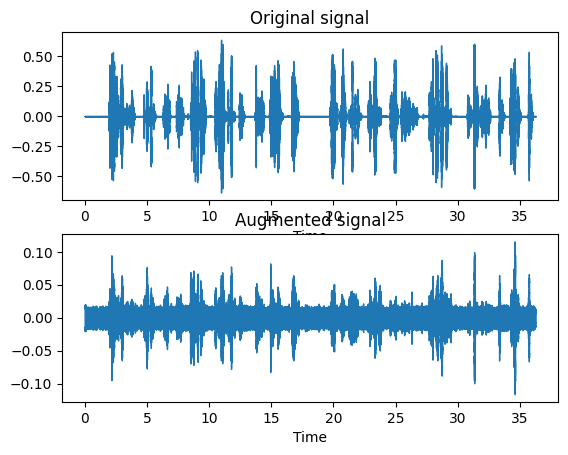

In [ ]:
import librosa
import soundfile as sf
from audiomentations import Compose, AddGaussianNoise, PitchShift, HighPassFilter



# install pydub for using HighPassFilter
# install audiomentations

# Raw audio augmentation
augment_raw_audio = Compose(
    [
        AddGaussianNoise(min_amplitude=0.01, max_amplitude=0.015, p=1),
        PitchShift(min_semitones=-8, max_semitones=8, p=1),
        HighPassFilter(min_cutoff_freq=2000, max_cutoff_freq=4000, p=1)
    ]
)

if __name__ == "__main__":
    signal, sr = librosa.load("/content/great advice 00000000.mp3")
    augmented_signal = augment_raw_audio(signal, sr)
    sf.write("augmented_audio.wav", augmented_signal, sr)
    _plot_signal_and_augmented_signal(signal, augmented_signal, sr)

In [ ]:
from IPython.display import Audio
Audio("/content/augmented_audio.wav")

**Reversing the Audio**

In [ ]:
from audiomentations import Reverse

transform = Reverse(p=1.0)

augmented_reverse = transform(signal, sample_rate=44100)
sf.write("augmented_reverese.wav", augmented_reverse, sr)

In [ ]:
from IPython.display import Audio
Audio("/content/augmented_reverese.wav")

**Pitch Shifting the Audio**

In [ ]:
from audiomentations import PitchShift

transform = PitchShift(
    min_semitones=-5.0,
    max_semitones=5.0,
    p=1.0
)

augmented_shifted = transform(signal, sample_rate=44100)
sf.write("augmented_shifted.wav",augmented_shifted,sr)
from IPython.display import Audio


In [ ]:
Audio("/content/augmented_shifted.wav")

**CUSTOM IR LOADER**

In [ ]:
from audiomentations import ApplyImpulseResponse

transform = ApplyImpulseResponse(ir_path="/content/CUST storage tank.WAV", p=1.0)

augmented_ir = transform(signal, sample_rate=sr)
sf.write("irloader.wav",augmented_ir,sr)
from IPython.display import Audio
Audio("/content/irloader.wav")

**Bit Crusher**

In [ ]:
from audiomentations import BitCrush

transform = BitCrush(min_bit_depth=8, max_bit_depth=14, p=1.0)
audio, sr = librosa.load("/content/morgan-freeman-convert-file.wav")
augmented_crush = transform(audio, sample_rate=sr)
sf.write("bitcrush.wav",augmented_crush,sr)
from IPython.display import Audio

In [ ]:
Audio("/content/bitcrush.wav")